In [1]:
import pandas as pd

In [2]:
# read historic Musk tweets
dfs = []

for year in range(2010, 2022):
    dft = pd.read_csv(f"data/{year}.csv")
    dfs.append(dft)

df = pd.concat(dfs)
df["date"] = pd.DatetimeIndex(df["date"])

In [3]:
df["date"].max()

Timestamp('2021-03-22 02:10:37')

In [4]:
# read historic dogecoin exchange rate
dogecoin = pd.read_csv("data/dogecoin.csv")
dogecoin["Date"] = pd.DatetimeIndex(dogecoin["Date"])
dogecoin = dogecoin.set_index("Date")

In [5]:
dogecoin.index.min()

Timestamp('2019-03-08 00:00:00')

In [6]:
dogecoin["diff"] = dogecoin["Close/Last"] - dogecoin["Open"]

In [7]:
dogecoin.sort_values("diff")

,Close/Last,Volume,Open,High,Low,diff
Date,,,,,,
2021-05-19,0.338595,NaN,0.430993,0.348367,0.297074,-0.092398
2021-04-20,0.314677,NaN,0.391699,0.333825,0.301313,-0.077022
2021-05-08,0.636101,NaN,0.708964,0.697487,0.625592,-0.072863
2021-05-06,0.570678,NaN,0.633124,0.597059,0.519357,-0.062446
2021-05-12,0.432055,NaN,0.491196,0.452448,0.353838,-0.059141
...,...,...,...,...,...,...
2021-05-20,0.398773,NaN,0.339523,0.411212,0.395935,0.059250
2021-04-18,0.340350,NaN,0.270872,0.340423,0.309128,0.069478
2021-05-07,0.702987,NaN,0.572634,0.710233,0.667511,0.130353


In [8]:
df[df["tweet"].str.contains("doge")]

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
2194,2194,1113164389929160706,1113145654363119616,1.554234e+12,2019-04-02 19:40:46,0,NaN,@dogecoin Uh oh,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'dogecoin', 'name': 'Dogecoin...",NaN,NaN,NaN,NaN
5599,5599,1113164389929160706,1113145654363119616,1.554234e+12,2019-04-02 19:40:46,0,NaN,@dogecoin Uh oh,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'dogecoin', 'name': 'Dogecoin...",NaN,NaN,NaN,NaN
57,57,1370885153262817283,1370885153262817283,1.615679e+12,2021-03-13 23:51:05,0,NaN,"Why are you so dogematic, they ask",en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
221,221,1363067491673468932,1362771890960551938,1.613816e+12,2021-02-20 10:06:29,0,NaN,@PPathole @dogecoin Just some used Antminer L3...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'PPathole', 'name': 'Pranay P...",NaN,NaN,NaN,NaN
223,223,1363046350900785156,1362771890960551938,1.613811e+12,2021-02-20 08:42:28,0,NaN,@dogecoin I just set up some little Doge minin...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'dogecoin', 'name': 'Dogecoin...",NaN,NaN,NaN,NaN
268,268,1359791422711492608,1359791422711492608,1.613035e+12,2021-02-11 09:08:33,0,NaN,"Frodo was the underdoge, All thought he would ...",en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
6221,6221,1113164389929160706,1113145654363119616,1.554234e+12,2019-04-02 19:40:46,0,NaN,@dogecoin Uh oh,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'dogecoin', 'name': 'Dogecoin...",NaN,NaN,NaN,NaN


In [9]:
dogecoin.describe()

,Close/Last,Volume,Open,High,Low,diff
count,862.000000,0.0,862.000000,862.000000,862.000000,862.000000
mean,0.062012,NaN,0.061825,0.064254,0.060010,0.000187
std,0.119888,NaN,0.119804,0.124158,0.116160,0.014561
min,0.001540,NaN,0.001544,0.001685,0.001291,-0.092398
25%,0.002518,NaN,0.002516,0.002542,0.002494,-0.000086
50%,0.003001,NaN,0.002998,0.003041,0.002975,0.000001
75%,0.051461,NaN,0.051392,0.053779,0.050314,0.000090
max,0.702987,NaN,0.708964,0.710233,0.667511,0.148526


<AxesSubplot:ylabel='Frequency'>

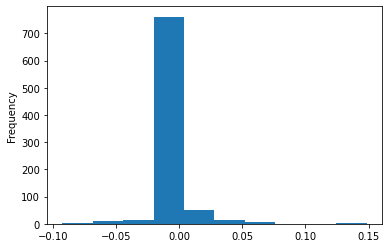

In [10]:
dogecoin["diff"].plot.hist()

In [11]:
import re
# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    text = re.sub(r"[^A-Za-z0-9 ]+", "", text)
    
    return text

# Clean The Text
#df["cleaned_tweet"] = df["tweet"].apply(cleantext)
# df.head()

In [12]:
# define tweet-words of interest
crypto_words = [
    "@dogecoin",
    "dogecoin",
    "#dogecoin",
    "doge",
    "crypto",
]

def crypto_subject(text):
    words = text.lower().split(" ")
    return len(set(crypto_words).intersection(set(words))) > 0

In [13]:
tweet_text = df.loc[df["id"] == 1113164389929160706].iloc[0].tweet
tweet_text

'@dogecoin Uh oh'

In [14]:
# Does tweet contain a "crypto_subject"
df["crypto"] = df["tweet"].apply(crypto_subject)

In [15]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

stop_words = set(stopwords.words('english'))
sid_obj = SentimentIntensityAnalyzer()

def calculate_sentiment(text):
    text = cleantext(text)
    word_tokens = word_tokenize(text)

    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    sentiment_dict = sid_obj.polarity_scores(" ".join(filtered_sentence))

    return sentiment_dict["compound"]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MJG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MJG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
# Calculate sentiment per cleaned tweet (stop words and special characters removed)
df["sentiment"] = df["tweet"].apply(calculate_sentiment)

In [17]:
df[df["crypto"]]

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,crypto,sentiment
2151,2151,967728299282595840,967705296805253121,1.519559e+12,2018-02-25 11:49:40,0,NaN,@cheresh @andrestaltz End-to-end encryption en...,en,[],...,NaN,NaN,NaN,"[{'screen_name': 'cheresh', 'name': 'Evgeny Ch...",NaN,NaN,NaN,NaN,True,-0.4019
2192,2192,1113178951403180032,1113178951403180032,1.554238e+12,2019-04-02 20:38:38,0,NaN,Dogecoin value may vary https://t.co/UWerAhPv63,en,[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,True,0.3400
2193,2193,1113173498384441344,1113173498384441344,1.554236e+12,2019-04-02 20:16:58,0,NaN,Dogecoin rulz https://t.co/flWWUgAgLU,ht,[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,True,0.0000
2194,2194,1113164389929160706,1113145654363119616,1.554234e+12,2019-04-02 19:40:46,0,NaN,@dogecoin Uh oh,en,[],...,NaN,NaN,NaN,"[{'screen_name': 'dogecoin', 'name': 'Dogecoin...",NaN,NaN,NaN,NaN,True,0.0000
2195,2195,1113009339743100929,1113008901497278465,1.554197e+12,2019-04-02 09:24:39,0,NaN,@Tom_Heats Dogecoin might be my fav cryptocurr...,en,[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,True,0.8176
2544,2544,1098533927336083456,1098082385487376389,1.550746e+12,2019-02-21 10:44:32,0,NaN,"@coindesk That said, I still only own 0.25 BTC...",en,[],...,NaN,NaN,NaN,"[{'screen_name': 'CoinDesk', 'name': 'CoinDesk...",NaN,NaN,NaN,NaN,True,0.4939
5011,5011,967728299282595840,967705296805253121,1.519559e+12,2018-02-25 11:49:40,0,NaN,@cheresh @andrestaltz End-to-end encryption en...,en,[],...,NaN,NaN,NaN,"[{'screen_name': 'cheresh', 'name': 'Evgeny Ch...",NaN,NaN,NaN,NaN,True,-0.4019
64,64,1340590280848908288,1340590280848908288,1.608457e+12,2020-12-20 09:30:04,0,NaN,One word: Doge,en,[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,True,0.0000
2355,2355,1254039929333649409,1254014899950366720,1.587821e+12,2020-04-25 13:29:52,0,NaN,@28delayslater @justpaulinelol Dogecoin Mode,en,[],...,NaN,NaN,NaN,"[{'screen_name': '28delayslater', 'name': '🐶Ea...",NaN,NaN,NaN,NaN,True,0.0000
3142,3142,1223754759921897472,1223746177948094470,1.580601e+12,2020-02-01 23:47:25,0,NaN,@nichegamer The crypto scam level on Twitter i...,en,[],...,NaN,NaN,NaN,"[{'screen_name': 'nichegamer', 'name': 'Niche ...",NaN,NaN,NaN,NaN,True,-0.1531


In [18]:
# pos_dogecoin = df[df["crypto"] & (df["sentiment"]) > 0].date
df[df["crypto"]].date

2151   2018-02-25 11:49:40
2192   2019-04-02 20:38:38
2193   2019-04-02 20:16:58
2194   2019-04-02 19:40:46
2195   2019-04-02 09:24:39
2544   2019-02-21 10:44:32
5011   2018-02-25 11:49:40
64     2020-12-20 09:30:04
2355   2020-04-25 13:29:52
3142   2020-02-01 23:47:25
5597   2019-04-02 20:38:38
5598   2019-04-02 20:16:58
5599   2019-04-02 19:40:46
5600   2019-04-02 09:24:39
5949   2019-02-21 10:44:32
8416   2018-02-25 11:49:40
32     2021-03-18 21:17:16
40     2021-03-15 23:11:50
58     2021-03-13 23:46:16
59     2021-03-13 23:40:41
108    2021-03-06 04:40:30
143    2021-03-02 21:07:09
148    2021-03-02 17:50:44
149    2021-03-02 08:36:34
155    2021-03-01 19:57:08
212    2021-02-21 21:27:06
219    2021-02-20 20:52:56
221    2021-02-20 10:06:29
223    2021-02-20 08:42:28
233    2021-02-19 04:20:47
253    2021-02-14 23:33:22
254    2021-02-14 23:25:16
265    2021-02-11 23:27:37
276    2021-02-10 15:08:11
282    2021-02-10 07:13:58
296    2021-02-08 05:27:36
304    2021-02-07 22:25:14
3

In [19]:
df["date_day"] = df["date"].dt.date
dates = df[df["crypto"]]["date_day"]

In [20]:
sentiments = df[df["crypto"]].groupby("date_day")["sentiment"].sum()


In [21]:

dogecoin[dogecoin.index.isin(dates)]

,Close/Last,Volume,Open,High,Low,diff
Date,,,,,,
2021-03-18,0.057421,NaN,0.058044,0.057601,0.056462,-0.000623
2021-03-15,0.056454,NaN,0.059164,0.057432,0.055365,-0.002710
2021-03-13,0.062017,NaN,0.055599,0.063510,0.059116,0.006418
2021-03-06,0.051223,NaN,0.051659,0.051817,0.050708,-0.000436
2021-03-02,0.050662,NaN,0.051975,0.050677,0.050011,-0.001313
2021-03-01,0.051870,NaN,0.048816,0.052423,0.050556,0.003054
2021-02-21,0.057439,NaN,0.055929,0.058717,0.054799,0.001510
2021-02-20,0.055645,NaN,0.054352,0.056693,0.053350,0.001293
2021-02-19,0.054334,NaN,0.056837,0.055285,0.053021,-0.002503


In [22]:
final = pd.merge(sentiments, dogecoin, left_index=True, right_index=True)

In [23]:
final["variance"] = final["High"] - final["Low"]
final["jump"] = final["High"] - final["Open"]
final["fall"] = final["Low"] - final["Open"]

<AxesSubplot:xlabel='sentiment', ylabel='diff'>

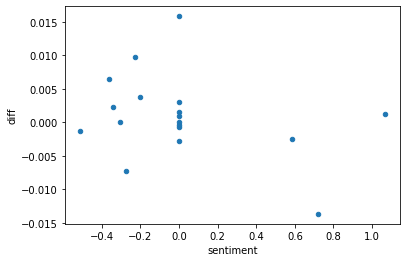

In [24]:
final.plot.scatter(x="sentiment", y="diff")

<AxesSubplot:xlabel='sentiment', ylabel='jump'>

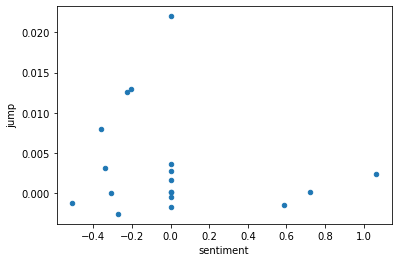

In [25]:
final.plot.scatter(x="sentiment", y="jump")

<AxesSubplot:xlabel='sentiment', ylabel='variance'>

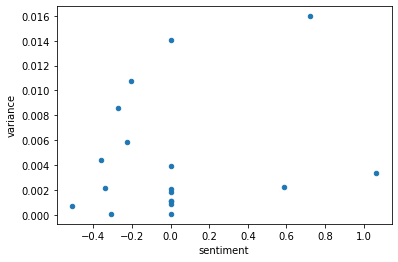

In [26]:
final.plot.scatter(x="sentiment", y="variance")

<AxesSubplot:xlabel='sentiment', ylabel='fall'>

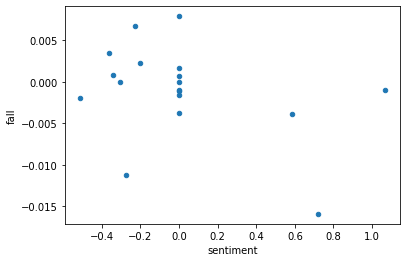

In [27]:
final.plot.scatter(x="sentiment", y="fall")